# Predicting Flight Delays
- Name: Jace Martin
- Email: hjm46@pitt.edu

- Research Question: Is there some pattern in flight delays that we can use to predict future delays in the US?

- Reason: I've always been interested in aviation and working in or with aviation as a career. I wanted to make a model that would have real impact in that industy.

- Usefulness: Predicting flights delays can help airlines accurately calculate how long a delay might take based on its nature and in turn imform passengers a better estimate of how long it might take. This will help reduce passenger dissatisfaction with an airport or airline. Additionly, given centain factors, a passenger can estimate if and how long their plane might be delayed allowed them to prepare for the possibility.

- Benefit: Primarily airports and passengers, but it could also be used by airlines if the delays are mechanical.

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Data

In [70]:
df = pd.read_csv("ATL.csv")
df = pd.concat([df, pd.read_csv("AUS.csv")])
df = pd.concat([df, pd.read_csv("BNA.csv")])
df = pd.concat([df, pd.read_csv("BOS.csv")])
df = pd.concat([df, pd.read_csv("BWI.csv")])
df = pd.concat([df, pd.read_csv("CLT.csv")])
df = pd.concat([df, pd.read_csv("DCA.csv")])
df = pd.concat([df, pd.read_csv("DEN.csv")])
df = pd.concat([df, pd.read_csv("DFW.csv")])
df = pd.concat([df, pd.read_csv("DTW.csv")])
df = pd.concat([df, pd.read_csv("EWR.csv")])

df = pd.concat([df, pd.read_csv("FLL.csv")])
df = pd.concat([df, pd.read_csv("IAD.csv")])
df = pd.concat([df, pd.read_csv("IAH.csv")])
df = pd.concat([df, pd.read_csv("JFK.csv")])
df = pd.concat([df, pd.read_csv("LAS.csv")])
df = pd.concat([df, pd.read_csv("LAX.csv")])
df = pd.concat([df, pd.read_csv("LGA.csv")])
df = pd.concat([df, pd.read_csv("MCO.csv")])
df = pd.concat([df, pd.read_csv("MDW.csv")])
df = pd.concat([df, pd.read_csv("MIA.csv")])

df = pd.concat([df, pd.read_csv("MSP.csv")])
df = pd.concat([df, pd.read_csv("ORD.csv")])
df = pd.concat([df, pd.read_csv("PHL.csv")])
df = pd.concat([df, pd.read_csv("PHX.csv")])
df = pd.concat([df, pd.read_csv("SAN.csv")])
df = pd.concat([df, pd.read_csv("SEA.csv")])
df = pd.concat([df, pd.read_csv("SFO.csv")])
df = pd.concat([df, pd.read_csv("SLC.csv")])
df = pd.concat([df, pd.read_csv("TPA.csv")])

df.head()

C:\Users\hanna\AppData\Local\Temp\ipykernel_15280\209671776.py:17: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([df, pd.read_csv("LAS.csv")])


,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,LateAircraftDelay,Temperature,Feels_Like_Temperature,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,NaN,True,15.0,2.0,0.0,...,13.0,66.0,66.0,1014.90,1014.6,8046.7,8.06,20.71,1.02,0.0
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,NaN,True,15.0,2.0,0.0,...,13.0,66.0,66.0,1014.90,1018.0,16093.4,10.36,24.74,0.51,0.0
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,NaN,False,0.0,NaN,NaN,...,NaN,62.0,62.1,1016.26,1015.8,16093.4,5.75,24.74,0.00,0.0
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,NaN,True,23.0,23.0,0.0,...,0.0,50.0,50.0,1016.93,1017.2,16093.4,14.96,20.71,0.00,0.0
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,NaN,False,0.0,NaN,NaN,...,NaN,56.0,55.9,1016.93,1017.0,16093.4,6.90,24.74,0.00,0.0


In [71]:
df.shape

(14494043, 22)

In [72]:
df.dtypes

Time                       object
Origin                     object
Dest                       object
Carrier                    object
Cancelled                    bool
CancellationReason         object
Delayed                      bool
DepDelayMinutes           float64
CarrierDelay              float64
WeatherDelay              float64
NASDelay                  float64
SecurityDelay             float64
LateAircraftDelay         float64
Temperature               float64
Feels_Like_Temperature    float64
Altimeter_Pressure        float64
Sea_Level_Pressure        float64
Visibility                float64
Wind_Speed                float64
Wind_Gust                 float64
Precipitation             float64
Ice_Accretion_3hr         float64
dtype: object

It looks like all these columns might be important for our model, so we will keep them all.

### Checking for Missing Values
I didn't make a heatmap since this dataset is quite large, so I just got the number of missing values for each column

In [73]:
print(df.isnull().sum())

Time                             0
Origin                           0
Dest                             0
Carrier                          0
Cancelled                        0
CancellationReason        14162151
Delayed                          0
DepDelayMinutes             321246
CarrierDelay              11336160
WeatherDelay              11336160
NASDelay                  11336160
SecurityDelay             11336160
LateAircraftDelay         11336160
Temperature                      0
Feels_Like_Temperature           0
Altimeter_Pressure               0
Sea_Level_Pressure               0
Visibility                       0
Wind_Speed                       0
Wind_Gust                        0
Precipitation                    0
Ice_Accretion_3hr                0
dtype: int64


I think all the missing values for the delays is because the plane wasn't delayed, so we can replace them with zeros. Same with the missing values for CancellationReason, except we'll replace those with a value for "Not Cancelled".

In [74]:
df["CancellationReason"].unique()

array([nan, 'Weather', 'Carrier', 'National Air System', 'Security'],
      dtype=object)

In [75]:
df["CancellationReason"] = df["CancellationReason"].fillna("Not Cancelled")
df["CarrierDelay"] = df["CarrierDelay"].fillna(0)
df["WeatherDelay"] = df["WeatherDelay"].fillna(0)
df["NASDelay"] = df["NASDelay"].fillna(0)
df["SecurityDelay"] = df["SecurityDelay"].fillna(0)
df["LateAircraftDelay"] = df["LateAircraftDelay"].fillna(0)
df["DepDelayMinutes"] = df["DepDelayMinutes"].fillna(0)

### Exploring the Data

In [76]:
df["Carrier"].unique()

array(['Endeavor Air Inc.', 'American Airlines Inc.',
       'Alaska Airlines Inc.', 'JetBlue Airways', 'Delta Air Lines Inc.',
       'Frontier Airlines Inc.', 'Envoy Air', 'Spirit Air Lines',
       'PSA Airlines Inc.', 'SkyWest Airlines Inc.',
       'United Air Lines Inc.', 'Southwest Airlines Co.',
       'Mesa Airlines Inc.', 'Republic Airline', 'Allegiant Air',
       'Horizon Air', 'Hawaiian Airlines Inc.'], dtype=object)

<Axes: xlabel='count', ylabel='Carrier'>

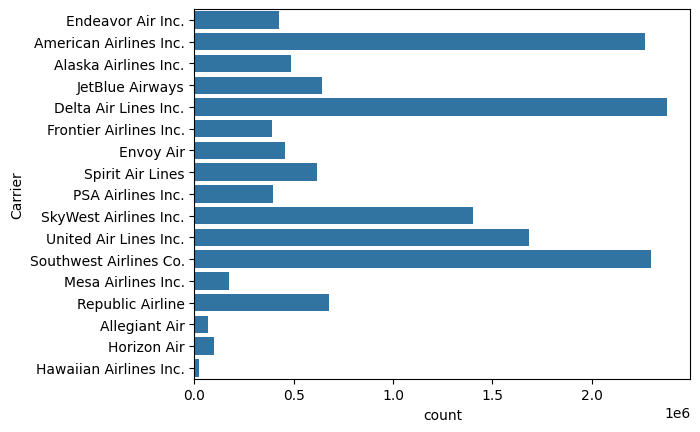

In [77]:
sns.countplot(data=df["Carrier"])

In [78]:
df["Origin"].unique()

array(['ATL', 'AUS', 'BNA', 'BOS', 'BWI', 'CLT', 'DCA', 'DEN', 'DFW',
       'DTW', 'EWR', 'FLL', 'IAD', 'IAH', 'JFK', 'LAS', 'LAX', 'LGA',
       'MCO', 'MDW', 'MIA', 'MSP', 'ORD', 'PHL', 'PHX', 'SAN', 'SEA',
       'SFO', 'SLC', 'TPA'], dtype=object)

<Axes: xlabel='count', ylabel='Origin'>

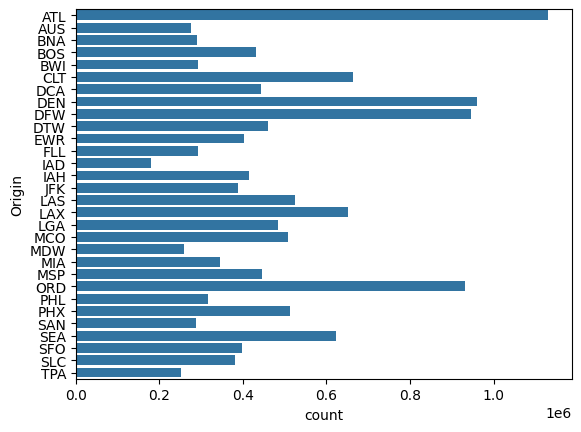

In [79]:
sns.countplot(data=df["Origin"])

In [80]:
df["Dest"].unique()

array(['HOU', 'GPT', 'CAE', 'CHO', 'MOB', 'TRI', 'MSN', 'OAJ', 'SAV',
       'DHN', 'AVL', 'JAN', 'VLD', 'GSO', 'LFT', 'GNV', 'LEX', 'OMA',
       'CHA', 'GRB', 'BTR', 'BMI', 'CHS', 'TYS', 'XNA', 'MGM', 'TUL',
       'AGS', 'BHM', 'BQK', 'HSV', 'ICT', 'MLU', 'IAD', 'TLH', 'VPS',
       'DSM', 'ABY', 'FAY', 'OKC', 'AEX', 'ROA', 'CRW', 'BUF', 'ECP',
       'GSP', 'DAL', 'GTR', 'SGF', 'DAY', 'CSG', 'ILM', 'SHV', 'LIT',
       'MYR', 'FWA', 'ATW', 'ALB', 'EVV', 'ABE', 'MLI', 'SBN', 'MDT',
       'CLT', 'MIA', 'DFW', 'PHX', 'ORD', 'SEA', 'FLL', 'JFK', 'BOS',
       'MCO', 'SMF', 'LAX', 'LGA', 'DCA', 'LAS', 'GEG', 'SAN', 'ONT',
       'BOI', 'SJU', 'PDX', 'SFO', 'TUS', 'DAB', 'SNA', 'PWM', 'DTW',
       'SLC', 'DEN', 'ELP', 'MSP', 'AUS', 'HNL', 'BDL', 'EWR', 'SAT',
       'SYR', 'IAH', 'PHL', 'TPA', 'MCI', 'ROC', 'MKE', 'GRR', 'MLB',
       'BWI', 'PBI', 'CLE', 'ORF', 'STL', 'RSW', 'CVG', 'CMH', 'SRQ',
       'MSY', 'IND', 'RDU', 'MEM', 'SDF', 'JAX', 'PNS', 'PIT', 'JAC',
       'BNA', 'RIC',

### Checking for Outliers

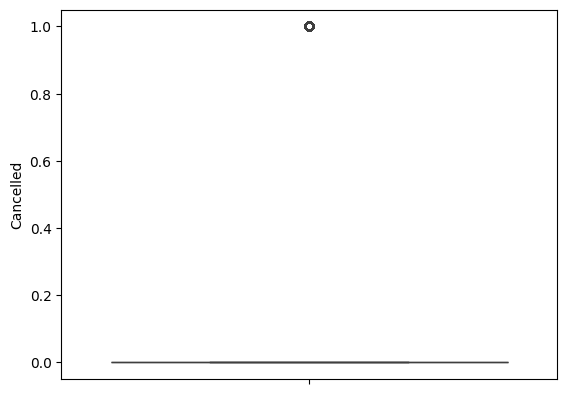

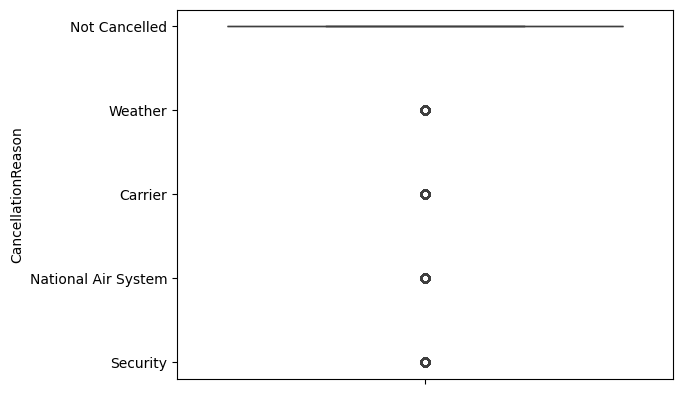

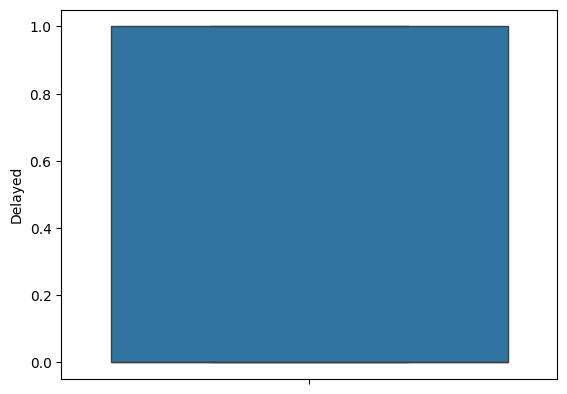

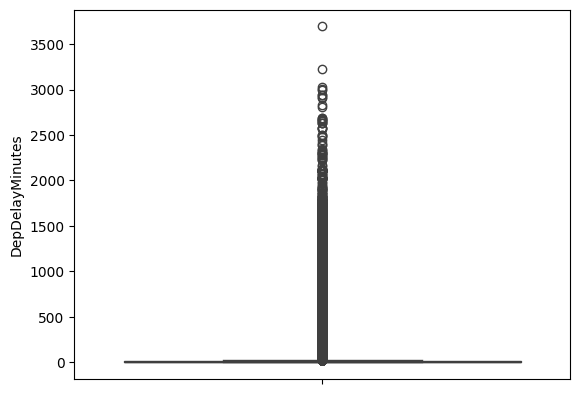

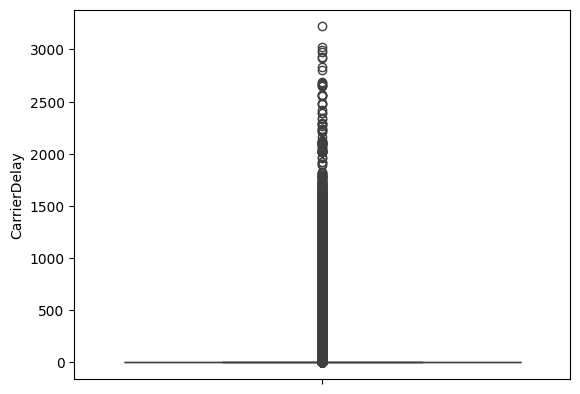

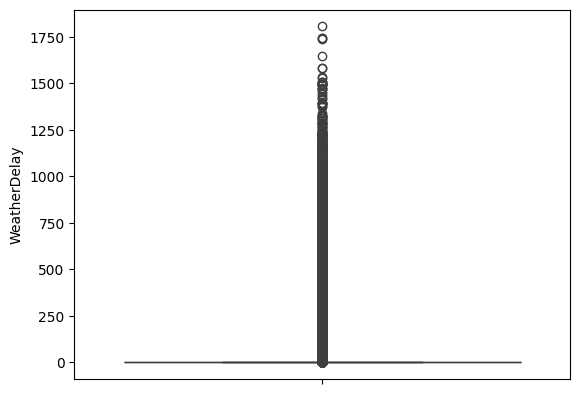

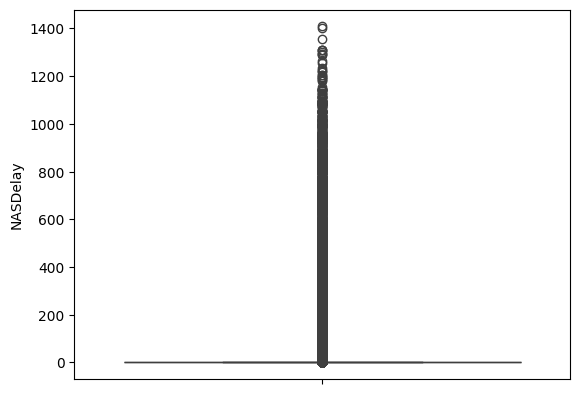

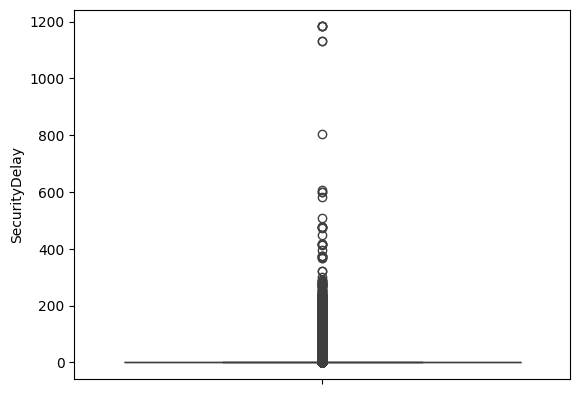

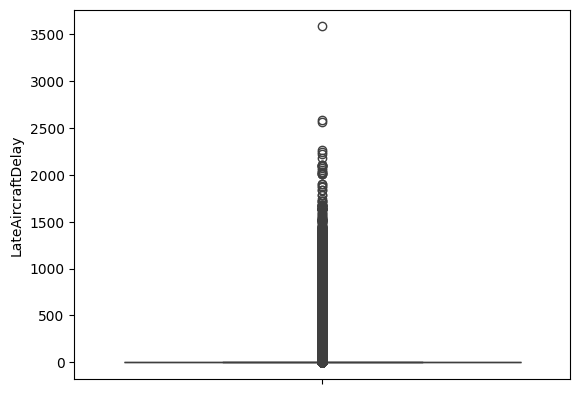

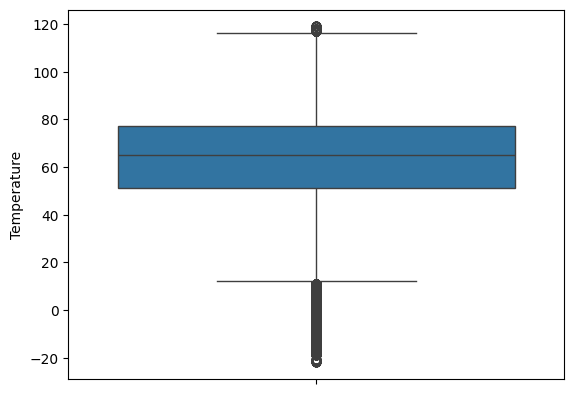

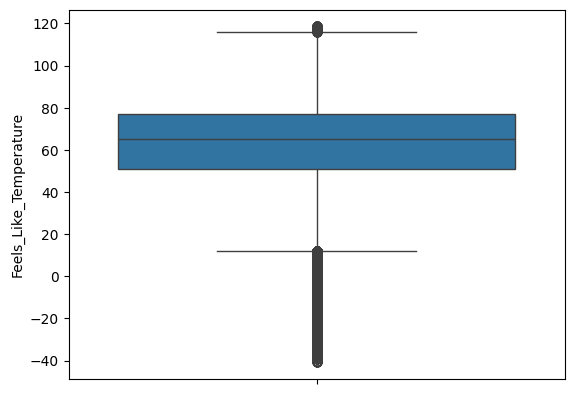

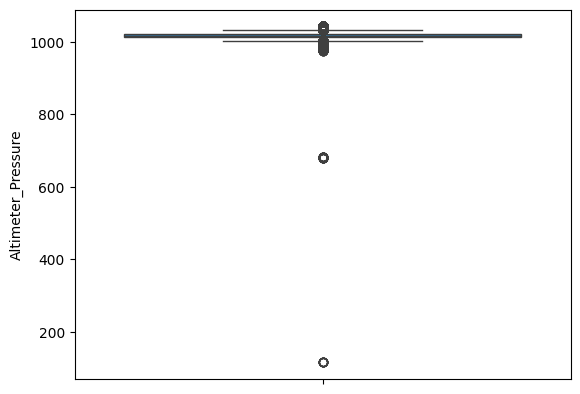

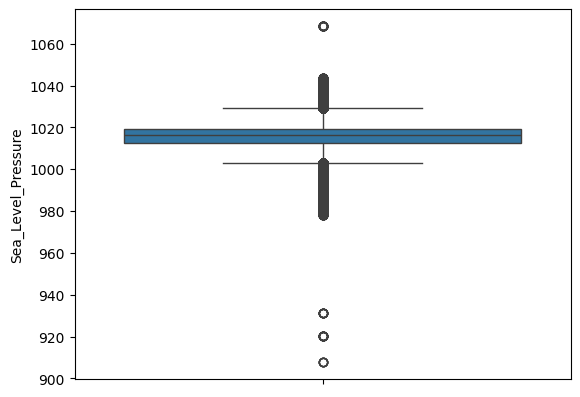

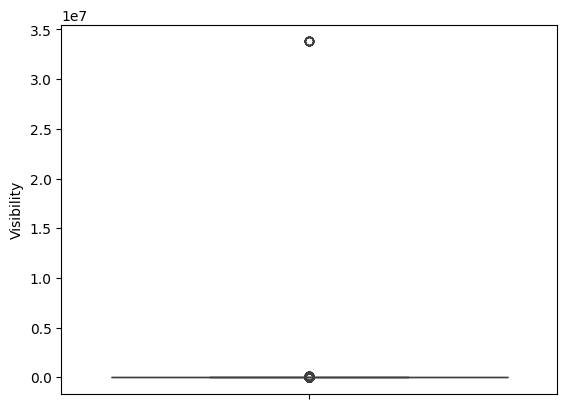

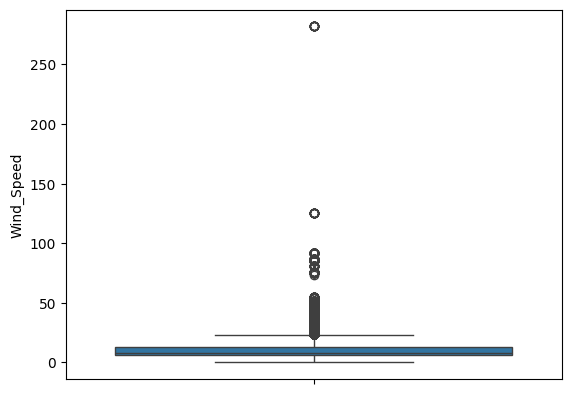

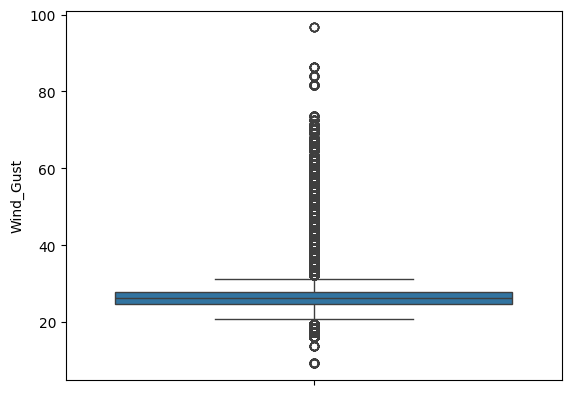

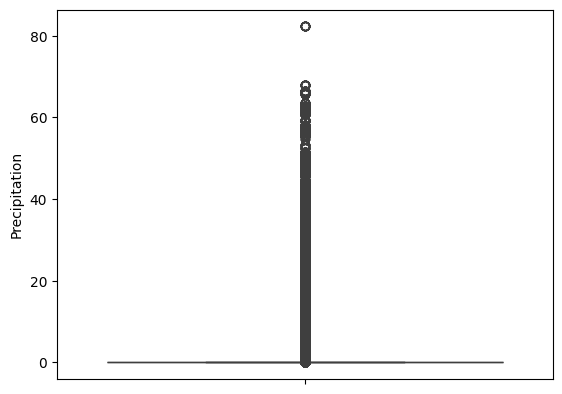

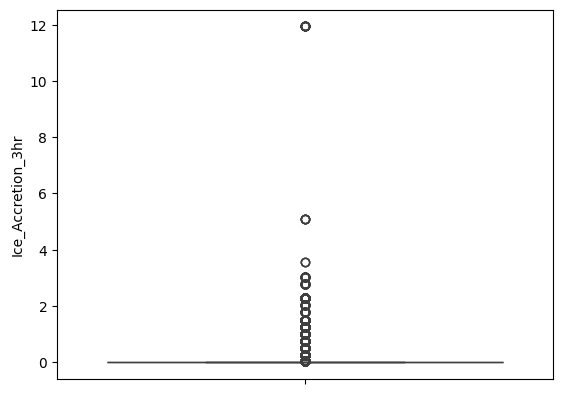

In [81]:
for col in df.columns[4:]:
    sns.boxplot(data=df[col])
    plt.show()

I don't think we can classify any of these outliers as due to human error and therefore we cannot discard them. After some analysis the outlier that is way higher than the other values for Visibility seems to be a generic value flights put when there are no visibility problems.

### Checking Distributions

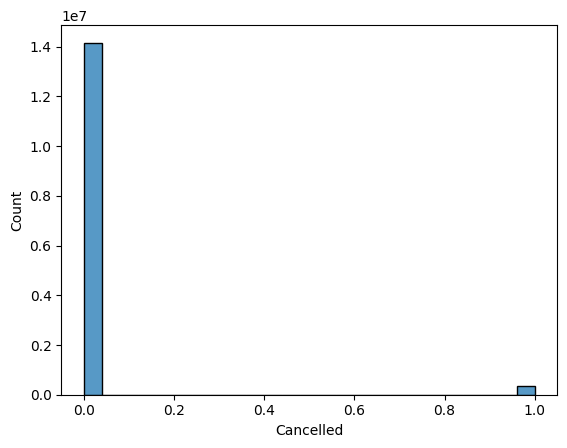

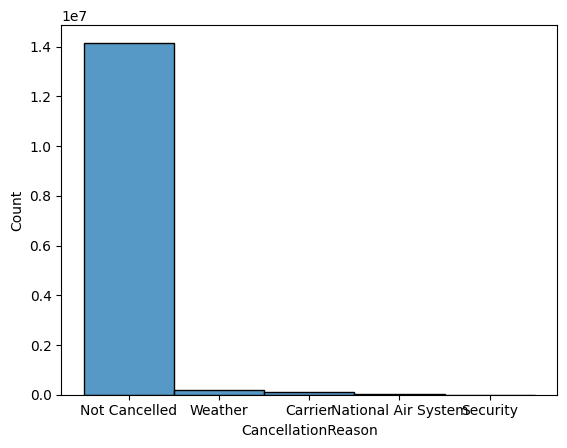

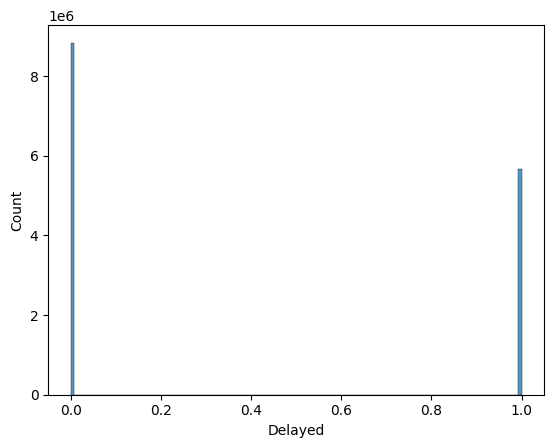

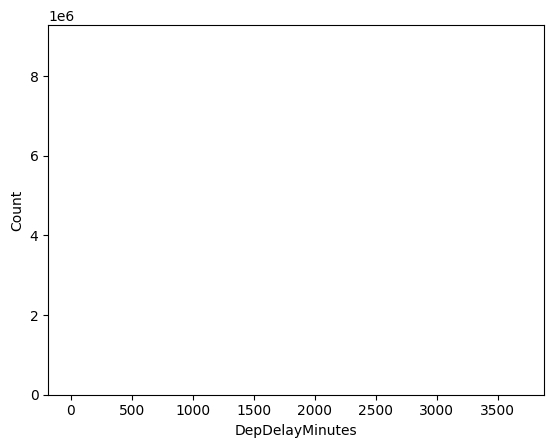

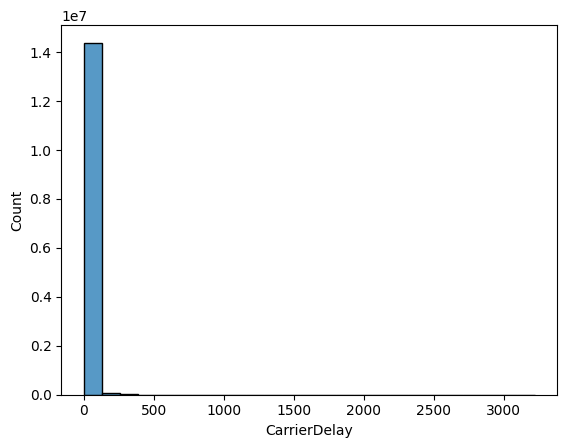

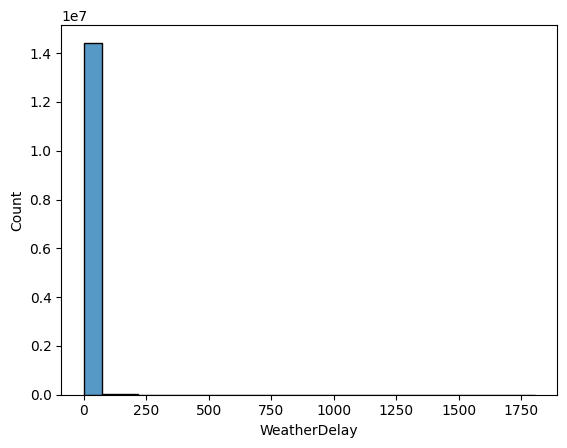

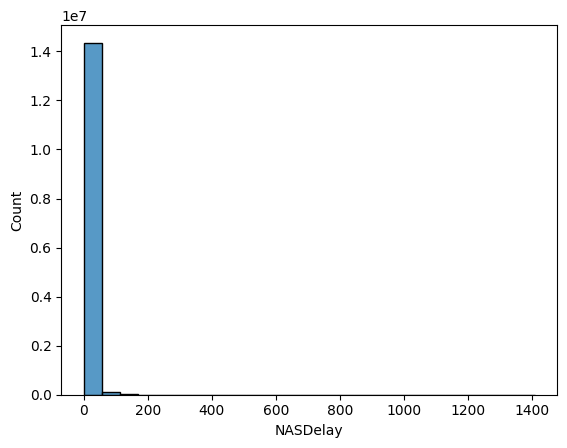

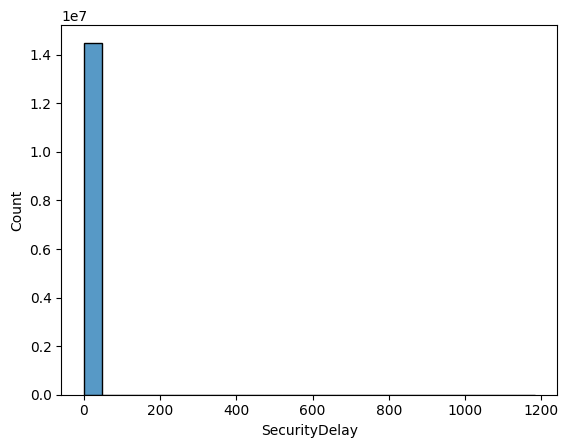

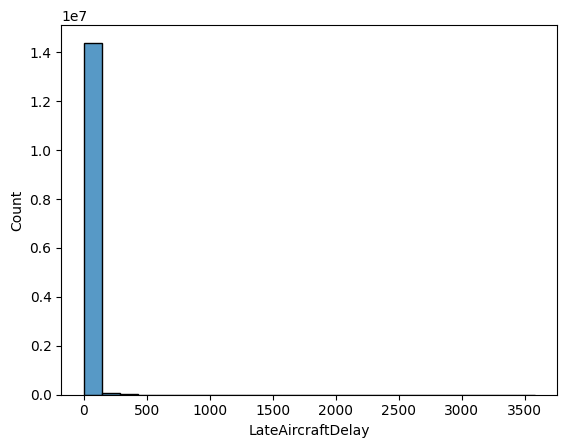

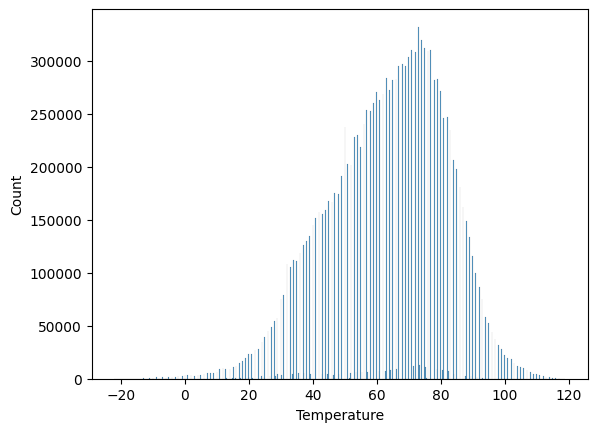

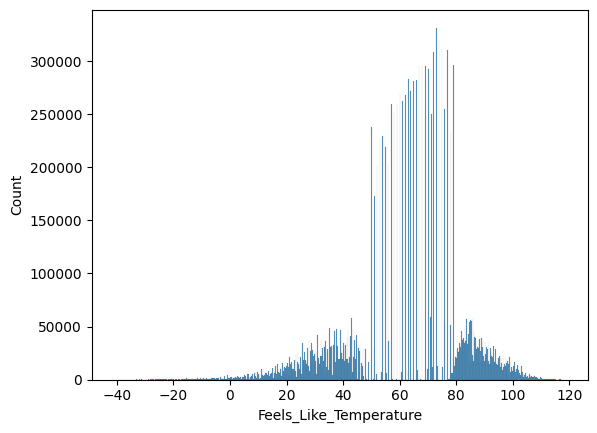

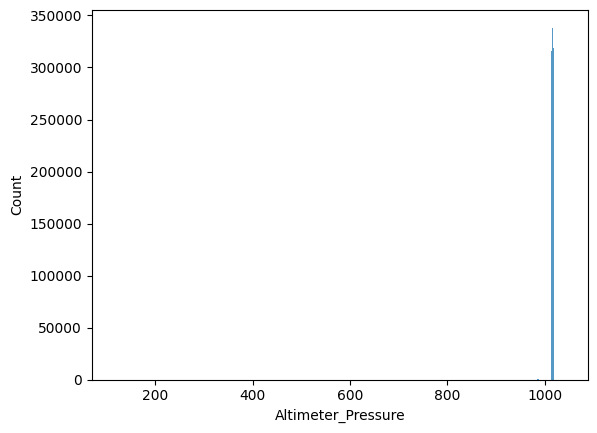

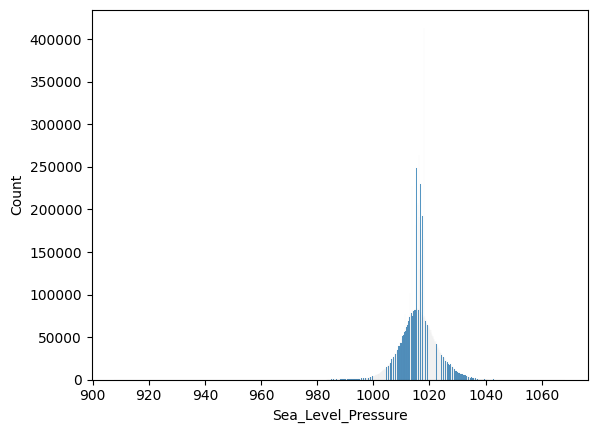

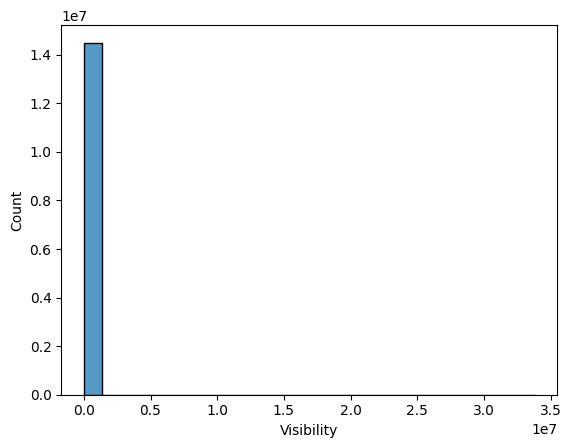

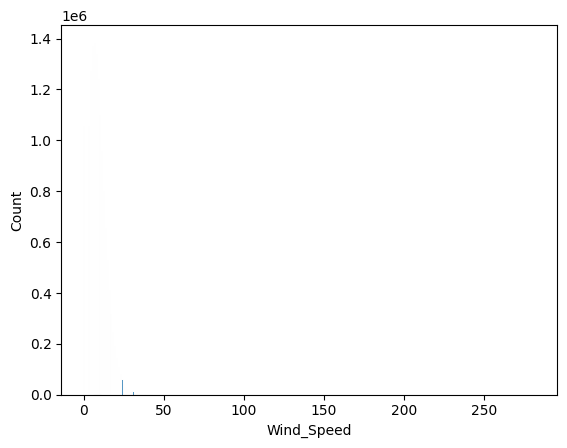

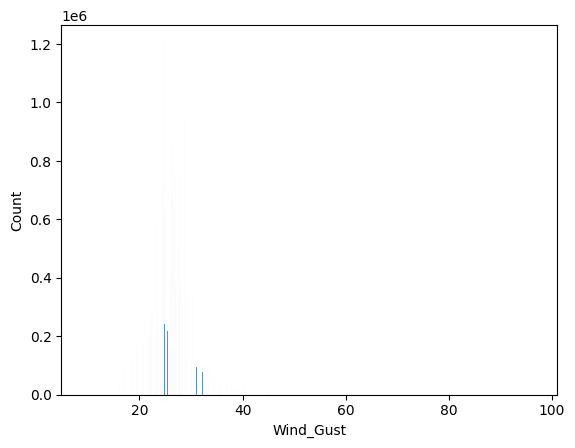

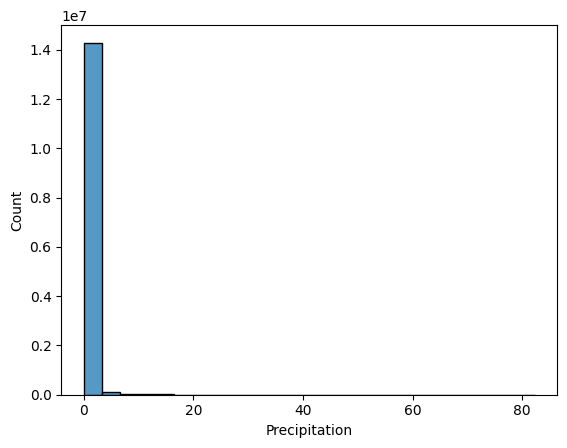

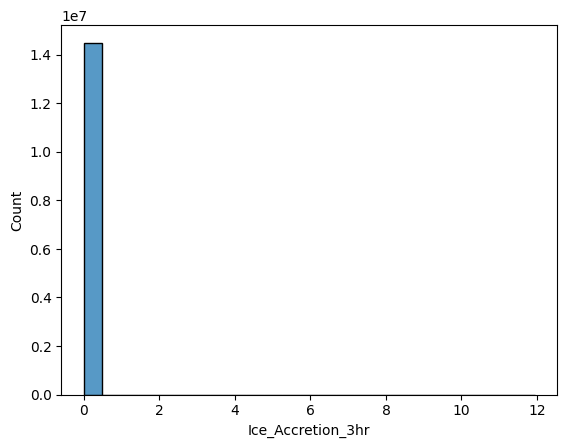

In [82]:
for col in df.columns[4:]:
    sns.histplot(data=df[col])
    plt.show()

After thinking and examinating the histograms, I think i will drop FeelsLikeTemp and Altimeter_Pressure from consideration for this model. I think FeelsLikeTemp takes into account wind and precipitation and we have that data already so FeelsLikeTemp is a bit redundant. I also Altimeter_Pressure is redundant with SeaLevelPressure and SeaLevelPressure seems to be the more precise and accurate one of the two.

It was pretty hard to see the distributions of DepDelayMinutes, Wind_Speed, and Wind_Gust so let's try to make a histogram with preset buckets to understand the distribution better.

<Axes: xlabel='DepDelayMinutes', ylabel='Count'>

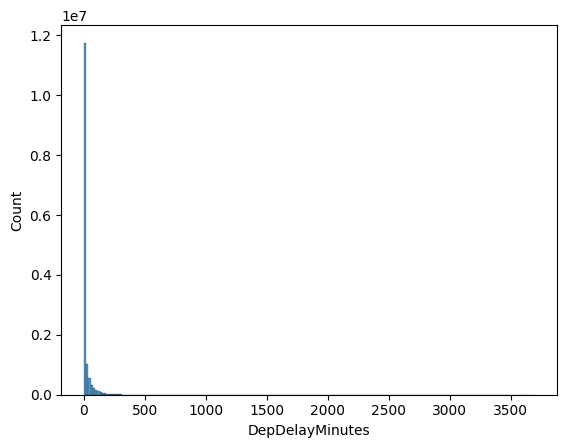

In [23]:
sns.histplot(data = df["DepDelayMinutes"], bins=200)

<Axes: xlabel='Wind_Speed', ylabel='Count'>

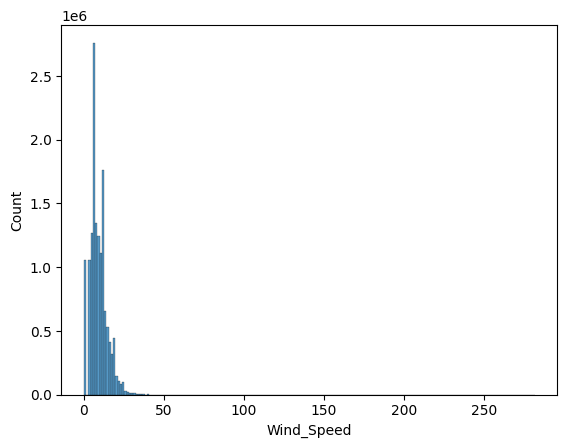

In [22]:
sns.histplot(data = df["Wind_Speed"], bins=200)

<Axes: xlabel='Wind_Gust', ylabel='Count'>

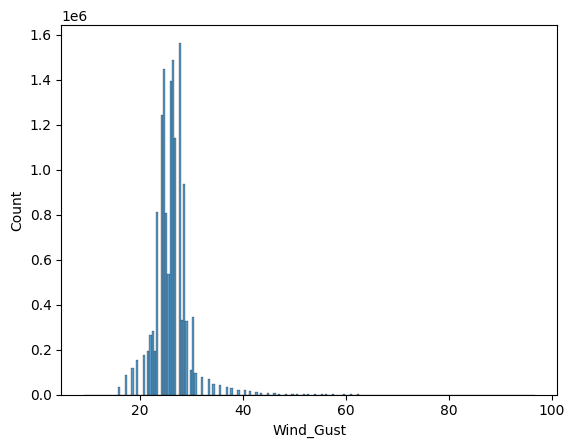

In [24]:
sns.histplot(data = df["Wind_Gust"], bins=200)

After examinations of the histograms, I think I will only transform Temperature. The other variables distributions are very skewed so I think my model would benefit from them being encoded into categories. We can't use the standard categories for things like wind speed if we transform those variables. I won't be encoding Sea_Level_Pressure however because I think this variable is fairly normally distributed. I will transform Temperature using squared transform because it is left skewed, however I will need to add a constant to every value to account for the negatives. Neither Temperature nor Sea_Level_Pressure have extremely large values so I will not be scaling them.


In [83]:
df["Temperature_transform"] = (df["Temperature"]+25)**2

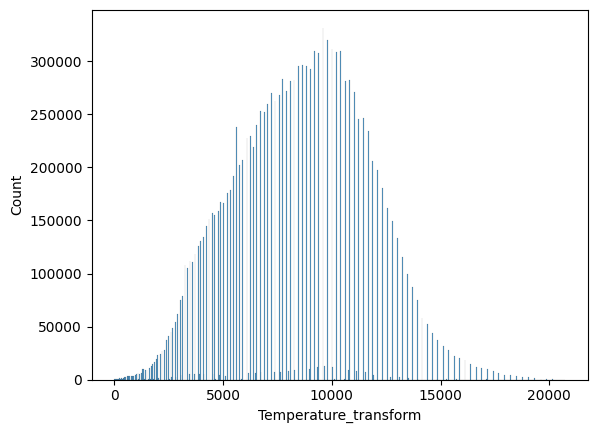

In [84]:
sns.histplot(df["Temperature_transform"])
plt.show()

### Encoding
Because the crucial data in varibles like Visibility is in the minority and there are standarized categories for classification, I will be using value count encoding for Origin, Dest, Carrier, CancellationReason, Visibility, Wind_Speed, Wind_Gust, Precepitation, and Ice Accretion. I decided to use vale count encoding because there are a large number of categories so one hot encoding would significantly increase the number of columns and this is a large dataset so there's less likelyhood of value counts between classes clashing.

In [85]:
frequency = df["Origin"].value_counts().to_dict()
frequency

{'ATL': 1130743,
 'DEN': 959826,
 'DFW': 946119,
 'ORD': 931676,
 'CLT': 663016,
 'LAX': 650471,
 'SEA': 623534,
 'LAS': 525082,
 'PHX': 511745,
 'MCO': 508198,
 'LGA': 482894,
 'DTW': 461035,
 'MSP': 446812,
 'DCA': 442469,
 'BOS': 431443,
 'IAH': 414754,
 'EWR': 403017,
 'SFO': 398942,
 'JFK': 388298,
 'SLC': 380735,
 'MIA': 344836,
 'PHL': 316851,
 'FLL': 293409,
 'BWI': 292742,
 'BNA': 289830,
 'SAN': 288079,
 'AUS': 276809,
 'MDW': 259174,
 'TPA': 251477,
 'IAD': 180027}

In [86]:
df["Origin_counts"] = df["Origin"].map(frequency)
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Feels_Like_Temperature,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr,Temperature_transform,Origin_counts
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,66.0,1014.90,1014.6,8046.7,8.06,20.71,1.02,0.0,8281.0,1130743
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,66.0,1014.90,1018.0,16093.4,10.36,24.74,0.51,0.0,8281.0,1130743
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,62.1,1016.26,1015.8,16093.4,5.75,24.74,0.00,0.0,7569.0,1130743
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,50.0,1016.93,1017.2,16093.4,14.96,20.71,0.00,0.0,5625.0,1130743
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,55.9,1016.93,1017.0,16093.4,6.90,24.74,0.00,0.0,6561.0,1130743


In [87]:
frequency = df["Dest"].value_counts().to_dict()
frequency

{'ATL': 485285,
 'ORD': 437771,
 'DEN': 422264,
 'LAX': 407834,
 'DFW': 361595,
 'MCO': 334625,
 'LAS': 329536,
 'BOS': 325352,
 'PHX': 299909,
 'SFO': 281520,
 'CLT': 281397,
 'LGA': 272200,
 'IAH': 271410,
 'SEA': 265825,
 'EWR': 264414,
 'JFK': 255093,
 'DTW': 252014,
 'MIA': 251629,
 'DCA': 224257,
 'MSP': 222365,
 'BNA': 219898,
 'FLL': 219299,
 'SLC': 203086,
 'AUS': 202284,
 'PHL': 195013,
 'TPA': 190655,
 'SAN': 179837,
 'RDU': 172779,
 'BWI': 165264,
 'STL': 147528,
 'MDW': 142515,
 'PDX': 141092,
 'MSY': 137038,
 'MCI': 132127,
 'IND': 127601,
 'IAD': 125336,
 'CLE': 124652,
 'PIT': 120896,
 'SMF': 120886,
 'CMH': 120548,
 'DAL': 119720,
 'CVG': 113407,
 'SNA': 106200,
 'SJC': 105760,
 'RSW': 99171,
 'SJU': 97756,
 'SAT': 97450,
 'JAX': 89517,
 'HOU': 89397,
 'MKE': 79722,
 'CHS': 79494,
 'OAK': 75523,
 'PBI': 72755,
 'SDF': 69981,
 'MEM': 69835,
 'BDL': 68915,
 'ORF': 68866,
 'OMA': 68752,
 'BOI': 66812,
 'HNL': 64478,
 'OKC': 63288,
 'BUF': 62797,
 'RIC': 59704,
 'RNO': 589

In [88]:
df["Dest_counts"] = df["Dest"].map(frequency)
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr,Temperature_transform,Origin_counts,Dest_counts
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,1014.90,1014.6,8046.7,8.06,20.71,1.02,0.0,8281.0,1130743,89397
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,1014.90,1018.0,16093.4,10.36,24.74,0.51,0.0,8281.0,1130743,89397
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,1016.26,1015.8,16093.4,5.75,24.74,0.00,0.0,7569.0,1130743,89397
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,1016.93,1017.2,16093.4,14.96,20.71,0.00,0.0,5625.0,1130743,89397
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,1016.93,1017.0,16093.4,6.90,24.74,0.00,0.0,6561.0,1130743,89397


In [89]:
frequency = df["Carrier"].value_counts().to_dict()
frequency

{'Delta Air Lines Inc.': 2377939,
 'Southwest Airlines Co.': 2300272,
 'American Airlines Inc.': 2268655,
 'United Air Lines Inc.': 1682510,
 'SkyWest Airlines Inc.': 1402746,
 'Republic Airline': 677025,
 'JetBlue Airways': 641668,
 'Spirit Air Lines': 615210,
 'Alaska Airlines Inc.': 485675,
 'Envoy Air': 458188,
 'Endeavor Air Inc.': 427178,
 'PSA Airlines Inc.': 397551,
 'Frontier Airlines Inc.': 390637,
 'Mesa Airlines Inc.': 175644,
 'Horizon Air': 98749,
 'Allegiant Air': 70577,
 'Hawaiian Airlines Inc.': 23819}

In [90]:
df["Carrier_counts"] = df["Carrier"].map(frequency)
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr,Temperature_transform,Origin_counts,Dest_counts,Carrier_counts
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,1014.6,8046.7,8.06,20.71,1.02,0.0,8281.0,1130743,89397,427178
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,1018.0,16093.4,10.36,24.74,0.51,0.0,8281.0,1130743,89397,427178
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,1015.8,16093.4,5.75,24.74,0.00,0.0,7569.0,1130743,89397,427178
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,1017.2,16093.4,14.96,20.71,0.00,0.0,5625.0,1130743,89397,427178
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,1017.0,16093.4,6.90,24.74,0.00,0.0,6561.0,1130743,89397,427178


In [91]:
frequency = df["CancellationReason"].value_counts().to_dict()
frequency

{'Not Cancelled': 14162151,
 'Weather': 192961,
 'Carrier': 102604,
 'National Air System': 34763,
 'Security': 1564}

In [92]:
df["Cancellation_counts"] = df["CancellationReason"].map(frequency)
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr,Temperature_transform,Origin_counts,Dest_counts,Carrier_counts,Cancellation_counts
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,8046.7,8.06,20.71,1.02,0.0,8281.0,1130743,89397,427178,14162151
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,16093.4,10.36,24.74,0.51,0.0,8281.0,1130743,89397,427178,14162151
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,16093.4,5.75,24.74,0.00,0.0,7569.0,1130743,89397,427178,14162151
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,16093.4,14.96,20.71,0.00,0.0,5625.0,1130743,89397,427178,14162151
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,16093.4,6.90,24.74,0.00,0.0,6561.0,1130743,89397,427178,14162151


### Ranges for Visibility encoding
* Visual Flight Rules: >5 miles, >8048 meters
* Mariginal Visual Flight Rules: 3-5 miles, 4828-8048 meters
* Instument Flight Rules: 1-3 miles, 1610-4828 meters
* Low Instrument Flight Rules: <1 mile, <1610 meters

In [93]:
df["Visibility_classes"] = pd.cut(df["Visibility"], [0, 1610, 4828, 8048, 100000], right=False,
                       labels=["Low Instrument Flight Rules", "Instument Flight Rules", 
                               "Mariginal Visual Flight Rules", "Visual Flight Rules"])
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr,Temperature_transform,Origin_counts,Dest_counts,Carrier_counts,Cancellation_counts,Visibility_classes
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,8.06,20.71,1.02,0.0,8281.0,1130743,89397,427178,14162151,Mariginal Visual Flight Rules
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,10.36,24.74,0.51,0.0,8281.0,1130743,89397,427178,14162151,Visual Flight Rules
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,5.75,24.74,0.00,0.0,7569.0,1130743,89397,427178,14162151,Visual Flight Rules
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,14.96,20.71,0.00,0.0,5625.0,1130743,89397,427178,14162151,Visual Flight Rules
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,6.90,24.74,0.00,0.0,6561.0,1130743,89397,427178,14162151,Visual Flight Rules


In [95]:
frequency = df["Visibility_classes"].value_counts().to_dict()
frequency

{'Visual Flight Rules': 13008667,
 'Mariginal Visual Flight Rules': 648706,
 'Instument Flight Rules': 521136,
 'Low Instrument Flight Rules': 315512}

In [96]:
df["Visbility_counts"] = df["Visibility_classes"].map(frequency)
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Wind_Gust,Precipitation,Ice_Accretion_3hr,Temperature_transform,Origin_counts,Dest_counts,Carrier_counts,Cancellation_counts,Visibility_classes,Visbility_counts
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,20.71,1.02,0.0,8281.0,1130743,89397,427178,14162151,Mariginal Visual Flight Rules,648706
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,24.74,0.51,0.0,8281.0,1130743,89397,427178,14162151,Visual Flight Rules,13008667
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,24.74,0.00,0.0,7569.0,1130743,89397,427178,14162151,Visual Flight Rules,13008667
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,20.71,0.00,0.0,5625.0,1130743,89397,427178,14162151,Visual Flight Rules,13008667
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,24.74,0.00,0.0,6561.0,1130743,89397,427178,14162151,Visual Flight Rules,13008667


### Ranges for Wind Speed and Wind Gust
I think there's more categories then we'll need so I will combine some. I'm using the Beaufort scale.
* Gentle Breeze: 0-10 mph
* Strong Breeze: 10-30 mph
* Gale: 30-50
* Storm: 50-70 mph
* Hurricane: >70 mph

In [97]:
df["WindSpeed_classes"] = pd.cut(df["Wind_Speed"], [0, 10, 30, 50, 70, 500], right=False,
                       labels=["Gentle Breeze", "Strong Breeze", "Gale", "Storm", "Hurricane"])
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Precipitation,Ice_Accretion_3hr,Temperature_transform,Origin_counts,Dest_counts,Carrier_counts,Cancellation_counts,Visibility_classes,Visbility_counts,WindSpeed_classes
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,1.02,0.0,8281.0,1130743,89397,427178,14162151,Mariginal Visual Flight Rules,648706,Gentle Breeze
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,0.51,0.0,8281.0,1130743,89397,427178,14162151,Visual Flight Rules,13008667,Strong Breeze
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,0.00,0.0,7569.0,1130743,89397,427178,14162151,Visual Flight Rules,13008667,Gentle Breeze
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,0.00,0.0,5625.0,1130743,89397,427178,14162151,Visual Flight Rules,13008667,Strong Breeze
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,0.00,0.0,6561.0,1130743,89397,427178,14162151,Visual Flight Rules,13008667,Gentle Breeze


In [98]:
frequency = df["WindSpeed_classes"].value_counts().to_dict()
frequency

{'Gentle Breeze': 8735999,
 'Strong Breeze': 5727758,
 'Gale': 30002,
 'Hurricane': 176,
 'Storm': 108}

In [99]:
df["WindSpeed_counts"] = df["WindSpeed_classes"].map(frequency)
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Ice_Accretion_3hr,Temperature_transform,Origin_counts,Dest_counts,Carrier_counts,Cancellation_counts,Visibility_classes,Visbility_counts,WindSpeed_classes,WindSpeed_counts
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,0.0,8281.0,1130743,89397,427178,14162151,Mariginal Visual Flight Rules,648706,Gentle Breeze,8735999
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,0.0,8281.0,1130743,89397,427178,14162151,Visual Flight Rules,13008667,Strong Breeze,5727758
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,0.0,7569.0,1130743,89397,427178,14162151,Visual Flight Rules,13008667,Gentle Breeze,8735999
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,0.0,5625.0,1130743,89397,427178,14162151,Visual Flight Rules,13008667,Strong Breeze,5727758
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,0.0,6561.0,1130743,89397,427178,14162151,Visual Flight Rules,13008667,Gentle Breeze,8735999


In [100]:
df["WindGust_classes"] = pd.cut(df["Wind_Gust"], [0, 10, 30, 50, 70, 500], right=False,
                       labels=["Gentle Breeze", "Strong Breeze", "Gale", "Storm", "Hurricane"])
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Temperature_transform,Origin_counts,Dest_counts,Carrier_counts,Cancellation_counts,Visibility_classes,Visbility_counts,WindSpeed_classes,WindSpeed_counts,WindGust_classes
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,8281.0,1130743,89397,427178,14162151,Mariginal Visual Flight Rules,648706,Gentle Breeze,8735999,Strong Breeze
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,8281.0,1130743,89397,427178,14162151,Visual Flight Rules,13008667,Strong Breeze,5727758,Strong Breeze
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,7569.0,1130743,89397,427178,14162151,Visual Flight Rules,13008667,Gentle Breeze,8735999,Strong Breeze
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,5625.0,1130743,89397,427178,14162151,Visual Flight Rules,13008667,Strong Breeze,5727758,Strong Breeze
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,6561.0,1130743,89397,427178,14162151,Visual Flight Rules,13008667,Gentle Breeze,8735999,Strong Breeze


In [101]:
frequency = df["WindGust_classes"].value_counts().to_dict()
frequency

{'Strong Breeze': 13640748,
 'Gale': 840237,
 'Storm': 12665,
 'Hurricane': 359,
 'Gentle Breeze': 34}

In [102]:
df["WindGust_counts"] = df["WindGust_classes"].map(frequency)
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Origin_counts,Dest_counts,Carrier_counts,Cancellation_counts,Visibility_classes,Visbility_counts,WindSpeed_classes,WindSpeed_counts,WindGust_classes,WindGust_counts
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,1130743,89397,427178,14162151,Mariginal Visual Flight Rules,648706,Gentle Breeze,8735999,Strong Breeze,13640748
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,1130743,89397,427178,14162151,Visual Flight Rules,13008667,Strong Breeze,5727758,Strong Breeze,13640748
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,1130743,89397,427178,14162151,Visual Flight Rules,13008667,Gentle Breeze,8735999,Strong Breeze,13640748
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,1130743,89397,427178,14162151,Visual Flight Rules,13008667,Strong Breeze,5727758,Strong Breeze,13640748
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,1130743,89397,427178,14162151,Visual Flight Rules,13008667,Gentle Breeze,8735999,Strong Breeze,13640748


### Ranges for Precipitation
from the Manual of Surface Weather Observations
* Light Rain: <2.5 mm/h
* Moderate Rain: 2.5-7.5 mm/h
* Heavy Rain: 7.5-50 mm/h
* Violent Rain: >50 mm/h

In [103]:
df["Precipitation_classes"] = pd.cut(df["Precipitation"], [0, 2.5, 7.5, 50, 500], right=False,
                       labels=["Light Rain", "Moderate Rain", "Heavy Rain", "Violent Rain"])
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Dest_counts,Carrier_counts,Cancellation_counts,Visibility_classes,Visbility_counts,WindSpeed_classes,WindSpeed_counts,WindGust_classes,WindGust_counts,Precipitation_classes
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,89397,427178,14162151,Mariginal Visual Flight Rules,648706,Gentle Breeze,8735999,Strong Breeze,13640748,Light Rain
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,89397,427178,14162151,Visual Flight Rules,13008667,Strong Breeze,5727758,Strong Breeze,13640748,Light Rain
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,89397,427178,14162151,Visual Flight Rules,13008667,Gentle Breeze,8735999,Strong Breeze,13640748,Light Rain
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,89397,427178,14162151,Visual Flight Rules,13008667,Strong Breeze,5727758,Strong Breeze,13640748,Light Rain
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,89397,427178,14162151,Visual Flight Rules,13008667,Gentle Breeze,8735999,Strong Breeze,13640748,Light Rain


In [104]:
frequency = df["Precipitation_classes"].value_counts().to_dict()
frequency

{'Light Rain': 14227970,
 'Moderate Rain': 192847,
 'Heavy Rain': 72677,
 'Violent Rain': 549}

In [105]:
df["Precipitation_counts"] = df["Precipitation_classes"].map(frequency)
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Carrier_counts,Cancellation_counts,Visibility_classes,Visbility_counts,WindSpeed_classes,WindSpeed_counts,WindGust_classes,WindGust_counts,Precipitation_classes,Precipitation_counts
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,427178,14162151,Mariginal Visual Flight Rules,648706,Gentle Breeze,8735999,Strong Breeze,13640748,Light Rain,14227970
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,427178,14162151,Visual Flight Rules,13008667,Strong Breeze,5727758,Strong Breeze,13640748,Light Rain,14227970
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,427178,14162151,Visual Flight Rules,13008667,Gentle Breeze,8735999,Strong Breeze,13640748,Light Rain,14227970
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,427178,14162151,Visual Flight Rules,13008667,Strong Breeze,5727758,Strong Breeze,13640748,Light Rain,14227970
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,427178,14162151,Visual Flight Rules,13008667,Gentle Breeze,8735999,Strong Breeze,13640748,Light Rain,14227970


### Ranges for Ice Accretion
from Aircraft Owners and Pilots Association
* Trace: 0-0.5 mm
* Light: 0.5-2 mm
* Moderate: 2-5 mm
* Severe: >5 mm

In [106]:
df["Ice_classes"] = pd.cut(df["Ice_Accretion_3hr"], [0, 0.5, 2, 5, 20], right=False,
                       labels=["Trace", "Light", "Moderate", "Severe"])
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Cancellation_counts,Visibility_classes,Visbility_counts,WindSpeed_classes,WindSpeed_counts,WindGust_classes,WindGust_counts,Precipitation_classes,Precipitation_counts,Ice_classes
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,14162151,Mariginal Visual Flight Rules,648706,Gentle Breeze,8735999,Strong Breeze,13640748,Light Rain,14227970,Trace
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,14162151,Visual Flight Rules,13008667,Strong Breeze,5727758,Strong Breeze,13640748,Light Rain,14227970,Trace
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,14162151,Visual Flight Rules,13008667,Gentle Breeze,8735999,Strong Breeze,13640748,Light Rain,14227970,Trace
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,14162151,Visual Flight Rules,13008667,Strong Breeze,5727758,Strong Breeze,13640748,Light Rain,14227970,Trace
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,14162151,Visual Flight Rules,13008667,Gentle Breeze,8735999,Strong Breeze,13640748,Light Rain,14227970,Trace


In [107]:
frequency = df["Ice_classes"].value_counts().to_dict()
frequency

{'Trace': 14492660, 'Light': 1042, 'Moderate': 313, 'Severe': 28}

In [108]:
df["Ice_counts"] = df["Ice_classes"].map(frequency)
df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,Visibility_classes,Visbility_counts,WindSpeed_classes,WindSpeed_counts,WindGust_classes,WindGust_counts,Precipitation_classes,Precipitation_counts,Ice_classes,Ice_counts
0,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,Mariginal Visual Flight Rules,648706,Gentle Breeze,8735999,Strong Breeze,13640748,Light Rain,14227970,Trace,14492660
1,2021-01-01 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,15.0,2.0,0.0,...,Visual Flight Rules,13008667,Strong Breeze,5727758,Strong Breeze,13640748,Light Rain,14227970,Trace,14492660
2,2021-01-02 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,Visual Flight Rules,13008667,Gentle Breeze,8735999,Strong Breeze,13640748,Light Rain,14227970,Trace,14492660
3,2021-01-03 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,True,23.0,23.0,0.0,...,Visual Flight Rules,13008667,Strong Breeze,5727758,Strong Breeze,13640748,Light Rain,14227970,Trace,14492660
4,2021-01-04 14:00:00,ATL,HOU,Endeavor Air Inc.,False,Not Cancelled,False,0.0,0.0,0.0,...,Visual Flight Rules,13008667,Gentle Breeze,8735999,Strong Breeze,13640748,Light Rain,14227970,Trace,14492660


In [114]:
df.dtypes

Time                        object
Origin                      object
Dest                        object
Carrier                     object
Cancelled                     bool
CancellationReason          object
Delayed                       bool
DepDelayMinutes            float64
CarrierDelay               float64
WeatherDelay               float64
NASDelay                   float64
SecurityDelay              float64
LateAircraftDelay          float64
Temperature                float64
Feels_Like_Temperature     float64
Altimeter_Pressure         float64
Sea_Level_Pressure         float64
Visibility                 float64
Wind_Speed                 float64
Wind_Gust                  float64
Precipitation              float64
Ice_Accretion_3hr          float64
Temperature_transform      float64
Origin_counts                int64
Dest_counts                  int64
Carrier_counts               int64
Cancellation_counts          int64
Visibility_classes        category
Visbility_counts    

### Predictor Variables
* Origin
    * Various conditions at the airport of origin might cause delays such as if it's a busy airport
    * using Origin_counts
* Dest
    * Same reason as Origin
    * using Dest_counts
* Carrier
    * Different airlines might have different standards of manufacuting or protocols that could result in a delay, such as using a plane model that has lower engine life expectany
    * using Carrier_counts
* Temperature
    * Differences in Temperature impact the likelyhood of pressure changes, icing, and wind speed. However since we have these other variables, Temperature might be highly correlated
    * using Temperature_transform
* Sea Level Pressure
    * Pressure changes can cause aborted landings because of air currents between higher and lower pressure destabilizing the plane. This could cause delays for future planes taking off
    * using Sea_Level_Pressure
* Visibility
    * Visibility impacts the way planes takeoff and land, so it can also cause the delaying of takeoff and landing
    * using Visbility_counts
* Wind Speed
    * Cross-winds are very dangerous when flying especially during takeoff and landing as they destabilize the plane, so this could be a crucial factor determining flight delays
    * using WindSpeed_counts
* Wind Gust
    * Same reason as Wind Speed, althought could be redundant
    * using WindGust_counts
* Precipitation
    * Weather conditions are one of the causes of cancellations so they also have an impact on flight delays
    * using Precipitation_counts
* Ice Accretion
    * Ice Accretion is one of the most dangerous things when flying because if it melts too quickly during landing it can cause sudden imbalance. This could cause delays for future planes taking off
    * using Ice_counts

### Response Varibles
* Cancelled
    * If a plane is cancelled, it's delayed for an indefinite amount of time
    * using Cancelled
* Cancellation Reason
    * The reasons planes are cancelled can give us clues for what reasons planes might be delayed
    * using Cancellation_counts
* Delayed
    * The question we're trying to answer: will the plane be delayed? But we want to take this a step further because it's frustrating as a passenger when your flight's delayed or cancelled and you don't know the reason.
    * using Delayed
* Departure Delay Minutes
    * Total minutes your flight might be delayed
    * using DepDelayMinutes
* Carrier Delay
    * Minutes your flight might be delayed due to mechanical issues
    * using CarrierDelay
* Weather Delay
    * Minutes your flight might be delayed due to inclement weather
    * using WeatherDelay
* NAS Delay
    * Minutes your flight might be delayed due to Air Traffic Control
    * using NASDelay
* Security Delay
    * Minutes your flight might be delayed due to Security protocals or issues
    * using SecurityDelay
* Late Aircraft Delay
    * Minutes your flight might be delayed due to the aircraft arriving late
    * using LateAircraftDelay

### Decriptive Statistics
Numerical Data

In [129]:
df["Temperature"].describe().apply(lambda x: format(x, "f")) #to disable scientific notation

count    14494043.000000
mean           63.151130
std            18.390661
min           -22.000000
25%            51.000000
50%            65.000000
75%            77.000000
max           119.000000
Name: Temperature, dtype: object

In [130]:
df["Sea_Level_Pressure"].describe().apply(lambda x: format(x, "f"))

count    14494043.000000
mean         1016.197399
std             6.261505
min           907.800000
25%          1012.800000
50%          1016.200000
75%          1019.400000
max          1068.400000
Name: Sea_Level_Pressure, dtype: object

Categorical Data

In [136]:
df["Origin"].describe()

count     14494043
unique          30
top            ATL
freq       1130743
Name: Origin, dtype: object

In [137]:
df["Dest"].describe()

count     14494043
unique         352
top            ATL
freq        485285
Name: Dest, dtype: object

In [135]:
df["Carrier"].describe()

count                 14494043
unique                      17
top       Delta Air Lines Inc.
freq                   2377939
Name: Carrier, dtype: object

In [139]:
df["CancellationReason"].describe()

count          14494043
unique                5
top       Not Cancelled
freq           14162151
Name: CancellationReason, dtype: object

In [134]:
df["Visibility_classes"].describe()

count                14494021
unique                      4
top       Visual Flight Rules
freq                 13008667
Name: Visibility_classes, dtype: object

In [140]:
df["WindSpeed_classes"].describe()

count          14494043
unique                5
top       Gentle Breeze
freq            8735999
Name: WindSpeed_classes, dtype: object

In [141]:
df["WindGust_classes"].describe()

count          14494043
unique                5
top       Strong Breeze
freq           13640748
Name: WindGust_classes, dtype: object

In [142]:
df["Precipitation_classes"].describe()

count       14494043
unique             4
top       Light Rain
freq        14227970
Name: Precipitation_classes, dtype: object

In [143]:
df["Ice_classes"].describe()

count     14494043
unique           4
top          Trace
freq      14492660
Name: Ice_classes, dtype: object

Response Varibles

In [145]:
df["DepDelayMinutes"].describe().apply(lambda x: format(x, "f"))

count    14494043.000000
mean           15.857433
std            51.162031
min             0.000000
25%             0.000000
50%             0.000000
75%            10.000000
max          3695.000000
Name: DepDelayMinutes, dtype: object

In [146]:
df["CarrierDelay"].describe().apply(lambda x: format(x, "f"))

count    14494043.000000
mean            5.539867
std            33.165137
min             0.000000
25%             0.000000
50%             0.000000
75%             0.000000
max          3221.000000
Name: CarrierDelay, dtype: object

In [147]:
df["WeatherDelay"].describe().apply(lambda x: format(x, "f"))

count    14494043.000000
mean            1.205622
std            16.547089
min             0.000000
25%             0.000000
50%             0.000000
75%             0.000000
max          1805.000000
Name: WeatherDelay, dtype: object

In [148]:
df["NASDelay"].describe().apply(lambda x: format(x, "f"))

count    14494043.000000
mean            2.727848
std            14.445899
min             0.000000
25%             0.000000
50%             0.000000
75%             0.000000
max          1409.000000
Name: NASDelay, dtype: object

In [149]:
df["SecurityDelay"].describe().apply(lambda x: format(x, "f"))

count    14494043.000000
mean            0.033258
std             1.698163
min             0.000000
25%             0.000000
50%             0.000000
75%             0.000000
max          1183.000000
Name: SecurityDelay, dtype: object

In [150]:
df["LateAircraftDelay"].describe().apply(lambda x: format(x, "f"))

count    14494043.000000
mean            5.327148
std            28.003108
min             0.000000
25%             0.000000
50%             0.000000
75%             0.000000
max          3581.000000
Name: LateAircraftDelay, dtype: object

### Issues
* Missing Values: I determined all the missing values in this dataset to be a result of the flight not being cancelled or delayed, so I could replace them with zeros or it's categorical equivalent.
* Outliers: I was unable to determine any outliers as a result of error so I had to keep them all as legit values,
* Skewed Distributions: Since I decided the encode most of my varibles, I couldn't transform their data as it would interfere categorizing it. However I did transform Temperature with squared transform as you can see below.

Original Temperature Column

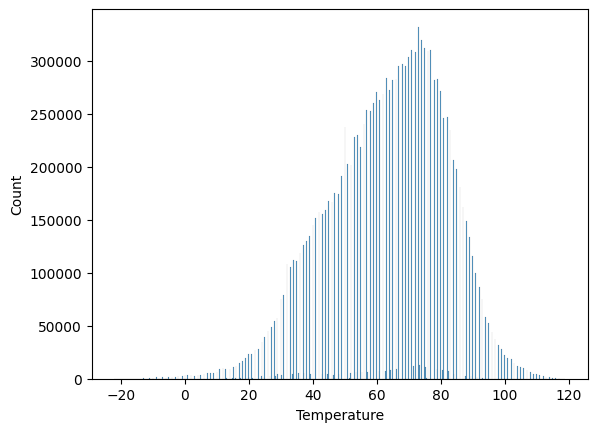

In [151]:
sns.histplot(df["Temperature"])
plt.show()

Transformed Temperature Column

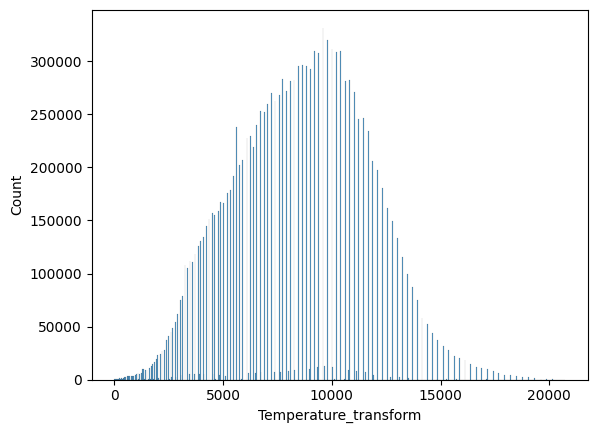

In [154]:
sns.histplot(df["Temperature_transform"])
plt.show()